<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1

---
## Problem Statement 
In order to raise the participation rate for both exam, the college board want to figure out where to allocate their resources to increase the test takers.


---

### Contents:
- [Background](#Background)
- [Data Dictionary](#Data_Dictionary)
- [Data Import & Cleaning](#Data_Import_&_Cleaning)
- [Exploratory Data Analysis](#Exploratory_Data_Analysis)
- [Data Visualization](#Data_Visualization)
- [Conclusions and Recommendations](#Conclusions_and_Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

## Data_Import_&_Cleaning

In [1]:
# for data cleaning and some math methods
import numpy as np
import pandas as pd
# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#### 1. Getting the data from the csv in the data folder.

In [2]:
act_2019_df = pd.read_csv('../data/act_2019.csv') 
sat_2019_df = pd.read_csv('../data/sat_2019.csv')
state_req = pd.read_excel('../data/state_requirement.xlsx')

#### 2. Displaying the data from the csv

In [3]:
#.head allows us the see the first five row by default and you can use different paramter to see different amount of rows
sat_2019_df.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [4]:
act_2019_df.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [5]:
state_req.head()

,State,Sat Req,Act Req
0,Alabama,No,Yes
1,Alaska,No,No
2,Arizona,No,No
3,Arkansas,No,Yes
4,California,No,No


#### 3. Checking for missing values

In [6]:
print(act_2019_df.isnull().sum())
print('------\n')
print(sat_2019_df.isnull().sum())
## There are no missing values 

State            0
Participation    0
Composite        0
dtype: int64
------

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64


#### 4. Check for obvious issues with the observations

In [7]:
print(sat_2019_df.max())
print('-----\n')
print(act_2019_df.max())
## ERROR
## Participation max rate is empty for sat_2019_df 

State                 Wyoming
Participation Rate          —
EBRW                      636
Math                      648
Total                    1284
dtype: object
-----

State            Wyoming
Participation        96%
Composite           25.5
dtype: object


#### 5. There are error in the Particaption Rate in Puerto Rico and Virgin Islands.(Also they are territory not state)

In [8]:
## Finding the index values of them to inorder to drop them in the next cell
print(sat_2019_df[sat_2019_df['State'] == "Puerto Rico"].index.values)
print(sat_2019_df[sat_2019_df['State'] == "Virgin Islands"].index.values)

[39]
[47]


In [9]:
## Since they are not state I will be removing them
sat_2019_df = sat_2019_df.drop([39,47])

#### 6. Looking at the data types to see if we need change some data types

In [10]:
print(sat_2019_df.dtypes)
print('------\n')
print(act_2019_df.dtypes)
print('------\n')
print(state_req.dtypes)
## Error from above can be fixed by changing the data types of Participation into int64.
## in both Data Frame we need to change some object into int and float types.

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object
------

State             object
Participation     object
Composite        float64
dtype: object
------

State      object
Sat Req    object
Act Req    object
dtype: object


#### 7. Fixing the error by above

In [11]:
def percent_to_float(x):
    x = x[0:-1]
    x = float(x)
    return x
def string_to_int(x):
    x = x.replace(',','')
    x = int(x)
    return x
## .apply it invoke function on values of Series
sat_2019_df['Participation Rate'] = sat_2019_df['Participation Rate'].apply(percent_to_float)
act_2019_df['Participation'] = act_2019_df['Participation'].apply(percent_to_float)

In [12]:
## Checking if the above cell work.
print(sat_2019_df['Participation Rate'].head())
print(act_2019_df['Participation'].head())

0     7.0
1    41.0
2    31.0
3     6.0
4    63.0
Name: Participation Rate, dtype: float64
0    100.0
1     38.0
2     73.0
3    100.0
4     23.0
Name: Participation, dtype: float64


#### 8. Rename the Columns to all lowercase and no spaces

In [13]:
## This is important to do as columns names should be unique and informative
## All lower case
sat_2019_df = sat_2019_df.rename(str.lower, axis = 'columns')
act_2019_df = act_2019_df.rename(str.lower, axis = 'columns')
state_req = state_req.rename(str.lower, axis = 'columns')
sat_2019_df = sat_2019_df.rename(columns={'ebrw':'english'})
## Replacing the spaces to _
sat_2019_df.columns = sat_2019_df.columns.str.replace(' ', '_') 
act_2019_df.columns = act_2019_df.columns.str.replace(' ', '_') 
state_req.columns = state_req.columns.str.replace(' ', '_') 

In [14]:
## Chekcing 
print(sat_2019_df.head())
print(act_2019_df.head())
print(state_req.head())

        state  participation_rate  english  math  total
0     Alabama                 7.0      583   560   1143
1      Alaska                41.0      556   541   1097
2     Arizona                31.0      569   565   1134
3    Arkansas                 6.0      582   559   1141
4  California                63.0      534   531   1065
        state  participation  composite
0     Alabama          100.0       18.9
1      Alaska           38.0       20.1
2     Arizona           73.0       19.0
3    Arkansas          100.0       19.3
4  California           23.0       22.6
        state sat_req act_req
0     Alabama      No     Yes
1      Alaska      No      No
2     Arizona      No      No
3    Arkansas      No     Yes
4  California      No      No


#### 9. Dropping unnecessary rows(if needed).

In [15]:
## Dropping District of Columbia, it is not a state
sat_2019_df = sat_2019_df.drop(8)
sat_2019_df.head(8)

,state,participation_rate,english,math,total
0,Alabama,7.0,583,560,1143
1,Alaska,41.0,556,541,1097
2,Arizona,31.0,569,565,1134
3,Arkansas,6.0,582,559,1141
4,California,63.0,534,531,1065
5,Colorado,100.0,518,506,1024
6,Connecticut,100.0,529,516,1046
7,Delaware,100.0,499,486,985


#### 10. Merge dataframes that can be merged

In [16]:
df_2019 = pd.merge(sat_2019_df,act_2019_df, on = 'state')
df_2019 = df_2019.rename(columns={'participation_rate':'sat_participation'})
df_2019 = df_2019.rename(columns={'participation':'act_participation'})
df_2019 = pd.merge(df_2019,state_req,on ='state')
df_2019

,state,sat_participation,english,math,total,act_participation,composite,sat_req,act_req
0,Alabama,7.0,583,560,1143,100.0,18.9,No,Yes
1,Alaska,41.0,556,541,1097,38.0,20.1,No,No
2,Arizona,31.0,569,565,1134,73.0,19.0,No,No
3,Arkansas,6.0,582,559,1141,100.0,19.3,No,Yes
4,California,63.0,534,531,1065,23.0,22.6,No,No
5,Colorado,100.0,518,506,1024,27.0,23.8,Yes,No
6,Connecticut,100.0,529,516,1046,22.0,25.5,Yes,No
7,Delaware,100.0,499,486,985,13.0,24.1,Yes,No
8,Florida,100.0,516,483,999,54.0,20.1,No,No
9,Georgia,71.0,538,519,1058,49.0,21.4,No,No


#### 11. Saving my Cleaned Data Frame

In [17]:
path = '../data/'
sat_2019_df.to_csv(path + 'project_sat_2019.csv')
act_2019_df.to_csv(path + 'project_act_2019_.csv')
df_2019.to_csv(path+'df_2019.csv')

## Data_Dictionary

Now that, the data is clean and processed, let's create a data dictionary
A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

For sat_2019_df

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|**object**|sat_2019|State in the U.S.A|
|**participation_rate**|*float*|sat_2019|The percent of participation of the Sat in each state.| 
|**english**|*int*|sat_2019|The average score of each state in english part|
|**math**|*int*|sat_2019|The average score of each state in math part|
|**total**|*int*|sat_2019|The average score of each state in total|

For act_2019_df

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|**object**|act_2019|State in the U.S.A|
|**participation_rate**|*float*|act_2019|The percent of participation of the Act in each state.| 
|**composite**|*float*|act_2019|The average score of all Act combine|

For state_req

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|**object**|state_req|State in the U.S.A|
|**sat_req**|**object**|state_req|Yes if the state requires the Test|
|**act_req**|**object**|state_req|Yes if the state requires the Test|

## Exploratory_Data_Analysis

#### 1. Summary Statistics

In [18]:
df_2019.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation,50.0,48.160,38.600180,2.0,5.25,52.50,81.75,100.0
english,50.0,562.120,45.742688,483.0,529.50,552.00,613.00,636.0
math,50.0,553.640,50.753409,460.0,516.75,546.00,600.50,648.0
total,50.0,1115.840,96.142403,943.0,1049.00,1098.50,1215.00,1284.0
act_participation,50.0,59.200,34.653386,6.0,24.25,58.50,100.00,100.0
composite,50.0,21.424,2.197267,17.9,19.80,20.95,23.75,25.5


#### 2. Standard Deviation of each column

In [19]:
sd = {i:np.std(df_2019[i]) for i in df_2019 if (i != 'state') & (i != 'sat_req') & (i != 'act_req')}
sd

{'sat_participation': 38.21222840924094,
 'english': 45.28295043391055,
 'math': 50.24331199274188,
 'total': 95.17612305615312,
 'act_participation': 34.30510166141473,
 'composite': 2.175183670405789}

#### 3. Investigate trends in the data

In [20]:
## Highest Sat Participation Rate by State
sat_high_participation = sat_2019_df.sort_values('participation_rate', ascending = False)
sat_high_participation = sat_high_participation.head(15)
sat_high_participation = sat_high_participation.sort_values('participation_rate')
sat_high_participation

,state,participation_rate,english,math,total
32,New York,79.0,531,533,1064
21,Massachusetts,81.0,559,561,1120
20,Maryland,82.0,535,523,1058
30,New Jersey,82.0,544,545,1090
29,New Hampshire,95.0,533,526,1059
50,West Virginia,99.0,483,460,943
19,Maine,99.0,512,502,1013
22,Michigan,100.0,507,496,1003
5,Colorado,100.0,518,506,1024
6,Connecticut,100.0,529,516,1046


In [21]:
## Highest Act Participation Rate by State
act_high_participation = act_2019_df.sort_values('participation', ascending = False)
act_high_participation = act_high_participation.head(25)
act_high_participation = act_high_participation.sort_values('participation')
act_high_participation

,state,participation,composite
31,New Mexico,63.0,19.3
15,Iowa,66.0,21.6
16,Kansas,72.0,21.2
2,Arizona,73.0,19.0
41,South Dakota,75.0,21.6
40,South Carolina,78.0,18.8
11,Hawaii,80.0,19.0
25,Missouri,82.0,20.8
23,Minnesota,95.0,21.4
34,North Dakota,96.0,19.9


In [22]:
## Lowest Sat Participation Rate by State
sat_low_participation = sat_2019_df.sort_values('participation_rate', ascending = True)
sat_low_participation.head(10)

,state,participation_rate,english,math,total
34,North Dakota,2.0,627,636,1263
52,Wyoming,3.0,623,615,1238
42,South Dakota,3.0,633,635,1268
27,Nebraska,3.0,628,631,1260
51,Wisconsin,3.0,635,648,1283
24,Mississippi,3.0,628,608,1237
15,Iowa,3.0,622,622,1244
45,Utah,4.0,614,615,1230
23,Minnesota,4.0,636,648,1284
17,Kentucky,4.0,620,612,1232


In [23]:
## Lowest Act Participation Rate by State
act_low_participation = act_2019_df.sort_values('participation', ascending = True)
act_low_participation.head(10)

,state,participation,composite
19,Maine,6.0,24.3
39,Rhode Island,12.0,24.7
7,Delaware,13.0,24.1
29,New Hampshire,14.0,25.0
38,Pennsylvania,17.0,23.6
22,Michigan,19.0,24.4
45,Vermont,20.0,24.1
21,Massachusetts,21.0,25.5
46,Virginia,21.0,24.0
6,Connecticut,22.0,25.5


In [24]:
## State above 50 participation rate by sat
state_above_50_sat = sat_2019_df[sat_2019_df['participation_rate'] >= 50]
state_above_50_sat

,state,participation_rate,english,math,total
4,California,63.0,534,531,1065
5,Colorado,100.0,518,506,1024
6,Connecticut,100.0,529,516,1046
7,Delaware,100.0,499,486,985
9,Florida,100.0,516,483,999
10,Georgia,71.0,538,519,1058
11,Hawaii,54.0,550,550,1100
12,Idaho,100.0,505,488,993
13,Illinois,100.0,509,504,1013
14,Indiana,66.0,543,537,1080


In [25]:
## State above 50 participation rate in ACT
state_above_50_act = act_2019_df[act_2019_df['participation'] >= 50]
state_above_50_act.head()

,state,participation,composite
0,Alabama,100.0,18.9
2,Arizona,73.0,19.0
3,Arkansas,100.0,19.3
9,Florida,54.0,20.1
11,Hawaii,80.0,19.0


In [26]:
## State above 50 participation rate in both exam
state_above_50 = df_2019[(df_2019['sat_participation'] >= 50) & (df_2019['act_participation'] >= 50) ]
state_above_50

,state,sat_participation,english,math,total,act_participation,composite,sat_req,act_req
8,Florida,100.0,516,483,999,54.0,20.1,No,No
10,Hawaii,54.0,550,550,1100,80.0,19.0,No,Yes
32,North Carolina,51.0,554,546,1100,100.0,19.0,No,Yes
39,South Carolina,68.0,526,504,1030,78.0,18.8,Yes,Yes


In [27]:
## State below 60 participation rate in both exam
state_below_60 = df_2019[(df_2019['sat_participation'] <= 60) & (df_2019['act_participation'] <= 60) ]
state_below_60

,state,sat_participation,english,math,total,act_participation,composite,sat_req,act_req
1,Alaska,41.0,556,541,1097,38.0,20.1,No,No
36,Oregon,51.0,562,550,1112,42.0,21.1,No,No


Highest Participation Rate By State
- ACT: Alabama, Kentucky, Wyoming, Wisconsin, Utah, Tennesee
- SAT: Michigan, Colorado, Connecticut, Delaware, Florida, Idaho, Illonio, Rhode Island

Lowest Participation Rate by State
- ACT: Maine, Rhode Island, Delaware, New Hampshire, Pennsylvania, Michigan, Vermont, Massachusetts, Virginia, Connecticut
- SAT: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin, Mississippi

## Data_Visualization

#### 1. Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features

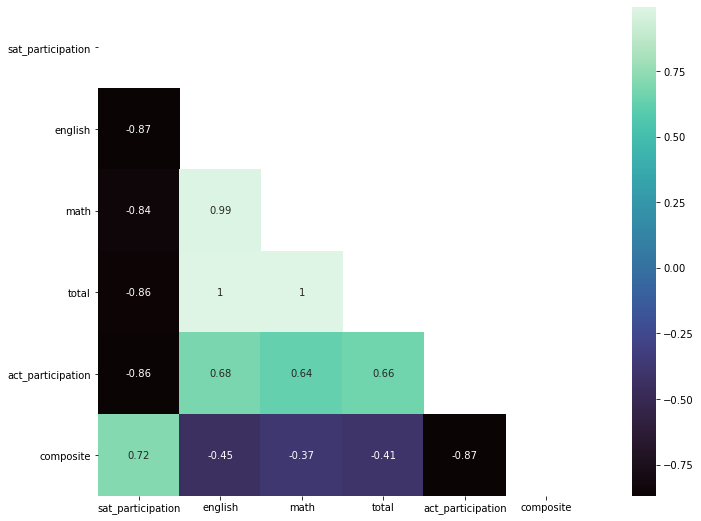

In [28]:
plt.figure(figsize= (16,9))
# Correlation of variables
corr = df_2019.corr()
# Set up the mask to "True" in the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', square = True,  annot = True, mask = mask);
plt.savefig('heatmap.png')

#### 2. Visualize distributions using histograms

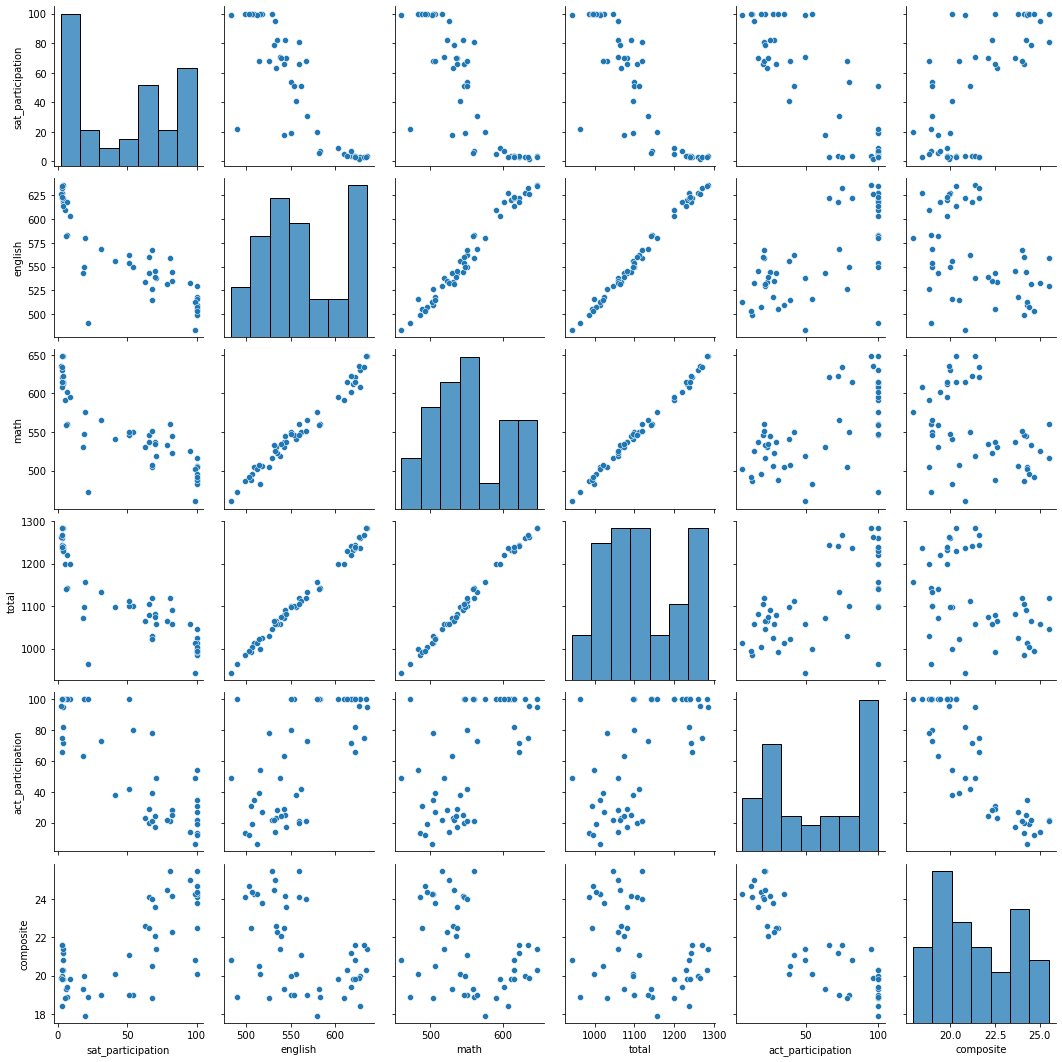

In [29]:
sns.pairplot(df_2019)

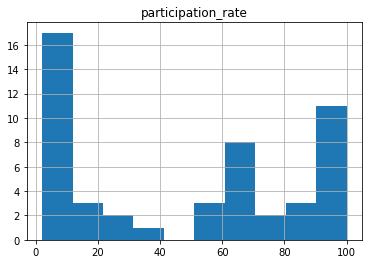

In [30]:
sat_2019_df.hist('participation_rate');

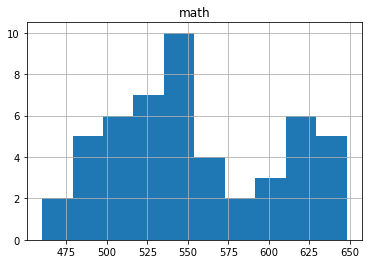

In [31]:
sat_2019_df.hist('math');

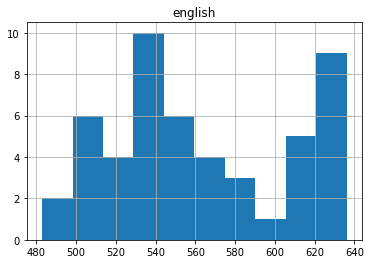

In [32]:
sat_2019_df.hist('english');

#### 3. Plot and line graph

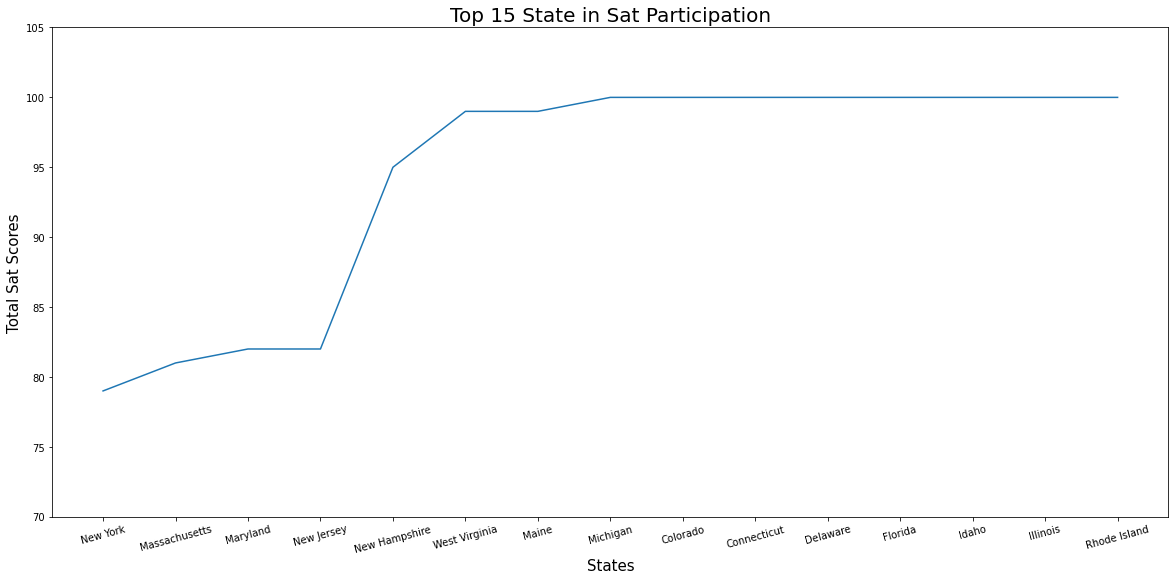

In [33]:
# Top 15 State in Sat Participation
plt.figure(figsize = (20,9))
plt.plot(sat_high_participation['state'],sat_high_participation['participation_rate'])
# Rotation Ticks
plt.xticks(rotation = 15)
# Axis Labels
plt.xlabel('States',fontsize =15)
plt.ylabel('Total Sat Scores', fontsize =15)
# Title
plt.title('Top 15 State in Sat Participation', fontsize = 20)
plt.ylim(70,105);

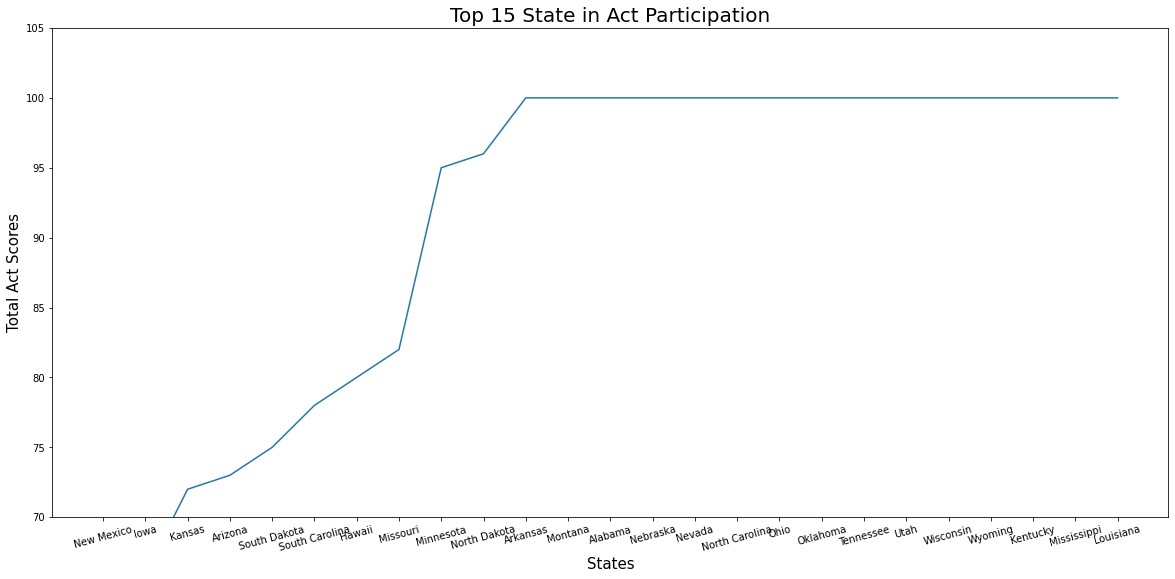

In [34]:
# Top 25 State in Sat Participation
plt.figure(figsize = (20,9))
plt.plot(act_high_participation['state'],act_high_participation['participation'])
# Rotation Ticks
plt.xticks(rotation = 15)
# Axis Labels
plt.xlabel('States',fontsize =15)
plt.ylabel('Total Act Scores', fontsize =15)
# Title
plt.title('Top 15 State in Act Participation', fontsize = 20)
plt.ylim(70,105);

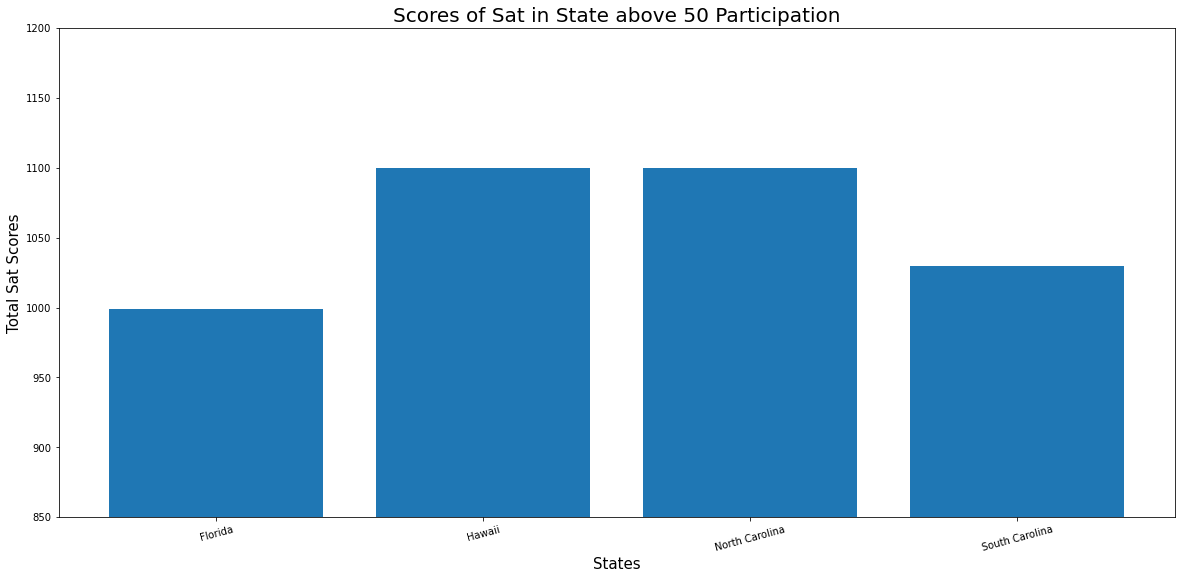

In [35]:
# state_above_50
plt.figure(figsize = (20,9))
plt.bar(x = state_above_50['state'], height = state_above_50['total'])
# Rotation Ticks
plt.xticks(rotation = 15)
# Axis Labels
plt.xlabel('States',fontsize =15)
plt.ylabel('Total Sat Scores', fontsize =15)
# Title
plt.title('Scores of Sat in State above 50 Participation', fontsize = 20)
plt.ylim(850,1200);
plt.savefig('state_above_50.png')

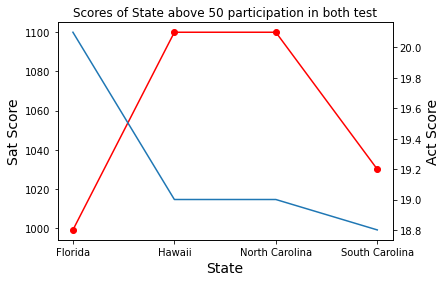

<Figure size 432x288 with 0 Axes>

In [36]:
# creating dual-y axes with subplots
fig,ax= plt.subplots()
ax.plot(state_above_50.state,state_above_50.total,marker='o', color = 'red')
# labels
ax.set_xlabel('State',fontsize = 14)
ax.set_ylabel('Sat Score', fontsize = 14)
# twin object for the two y-axis
ax2 = ax.twinx()
ax2.plot(state_above_50.state,state_above_50['composite'])
ax2.set_ylabel('Act Score', fontsize = 14)
plt.title('Scores of State above 50 participation in both test')
plt.show()
plt.savefig('state_above_50_dual.png')

#### 4. Plot and interpret scatter plots

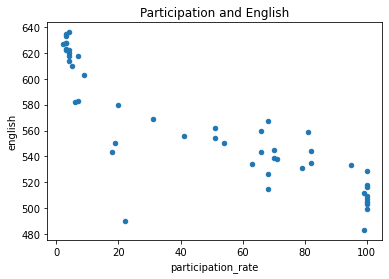

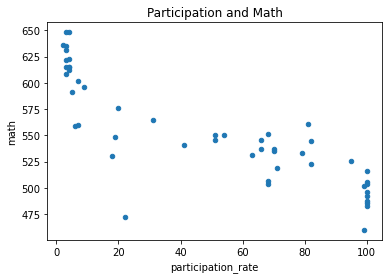

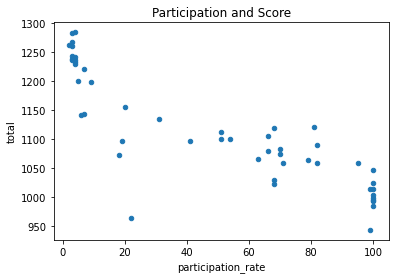

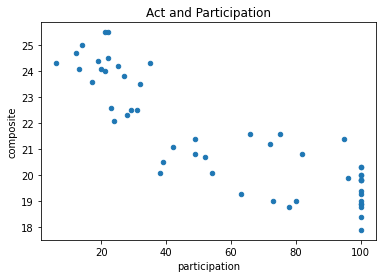

In [37]:
sat_2019_df.plot(kind = 'scatter', x = 'participation_rate', y = 'english', title = 'Participation and English');
sat_2019_df.plot(kind = 'scatter', x = 'participation_rate', y = 'math', title = 'Participation and Math');
sat_2019_df.plot(kind = 'scatter', x = 'participation_rate', y = 'total', title = 'Participation and Score');
act_2019_df.plot(kind = 'scatter', x = 'participation', y = 'composite', title = 'Act and Participation');
## no correlation between participation and the score

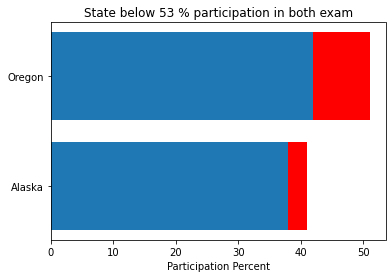

In [38]:
## state below 60 % participation in both exam
plt.title('State below 53 % participation in both exam')
plt.xlabel('Participation Percent')

plt.barh(state_below_60['state'], state_below_60['sat_participation'],color = 'red');
plt.barh(state_below_60['state'], state_below_60['act_participation']);
plt.savefig('state_belove_53.png')

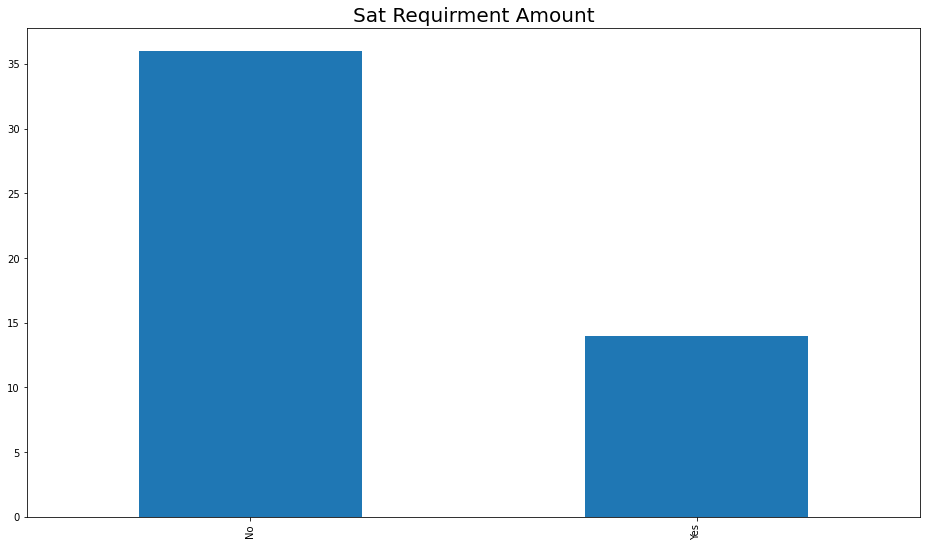

In [39]:
# if the state require the sat 
plt.figure(figsize = (16,9))
plt.title('Sat Requirment Amount', fontsize = 20)
(df_2019['sat_req']).value_counts().plot(kind = 'bar');


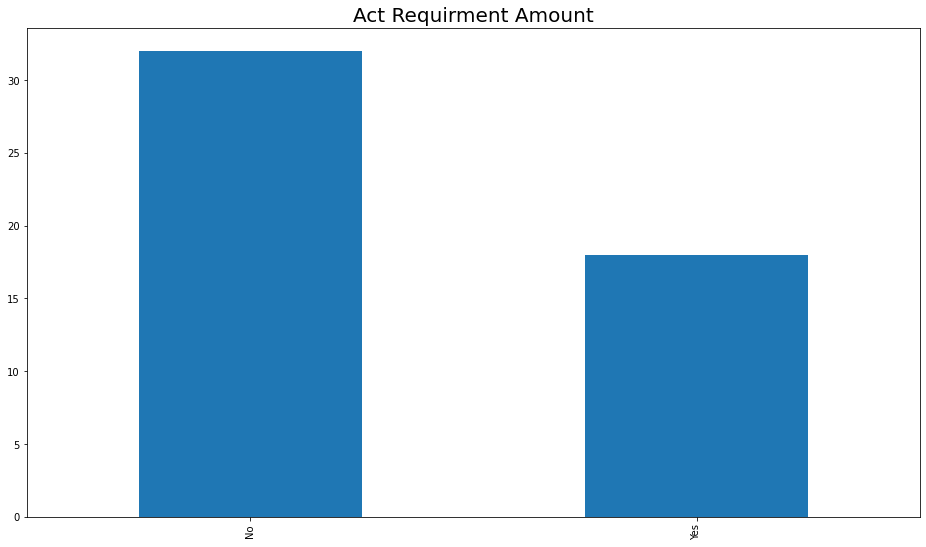

In [40]:
# if the state require Act
plt.figure(figsize = (16,9))
plt.title('Act Requirment Amount', fontsize = 20)
(df_2019['act_req']).value_counts().plot(kind = 'bar');


## Conclusions_and_Recommendations

Based on the exploration of the data, the key takeways are less than half of the state are require to take both tests. You can increase the participation in Oregon by mandating the tests by collabing with states with free tests. Also another recommendation would be to have Sat or Act weekday tests for student who have worked and obligations on weekdays